<a href="https://colab.research.google.com/github/kento-koyama/bayesian_predictive_micro_ICPMF12/blob/main/Rstan_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/kento-koyama/bayesian_predictive_micro_ICPMF12/blob/main/Rstan_example_from_google_to_git.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [ ]:
##As of January 2021, it is working well.
x<-installed.packages()
if(any(x[,1]== 'rstan') == FALSE){
    system("add-apt-repository -y ppa:marutter/rrutter4.0")
    system("add-apt-repository -y ppa:c2d4u.team/c2d4u4.0+") 
    system("add-apt-repository ppa:cran/v8") 
    system("apt-get update") 
    system("apt-get install libnode-dev") 
    system("apt-get install r-cran-rstan")
}


In [ ]:
#Loading the Rstan package.
library(rstan) 

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.8, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



In [ ]:
#Preparing the data.
coindata <- list(Y=21, T=30)  #The data is in list format. It was tossed 30 times and came up heads 21 times.





In [ ]:
#Here, you would store the Stan code in a variable called stancode.
stancode <- '
data{
  int Y;  //The number of times heads came up
  int T;  //The number of trials
}

parameters{
  real<lower=0, upper=1> theta;  //The probability of getting heads, denoted by θ.




}

model{
  theta ~ uniform(0, 1); //The uniform distribution (non-informative prior distribution) between 0 and 1.
  Y ~ binomial(T, theta);  //It follows a binomial distribution.
}

generated quantities{
  int y_pred;
  y_pred = binomial_rng(T,theta);
}
'

In [ ]:
#Running MCMC.
fit1 <- stan(model_code = stancode, data=coindata) 


SAMPLING FOR MODEL '3f4ad13601f184b130f0735a5e9973fc' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.008513 seconds (Warm-up)
Chain 1:                0.008172 seconds (Sampling)


In [ ]:
#Summary of the results.
summary(fit1) #Displaying the parameter means, convergence diagnostic indicators (such as Rhat), and other summary statistics.

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
theta,0.6855556,0.002112658,0.0788596,0.527047,0.6334701,0.6878245,0.740485,0.8317472,1393.319,0.9997308
y_pred,20.5400000,0.073792445,3.5193034,13.000000,18.0000000,21.0000000,23.000000,27.0000000,2274.519,0.9999555
lp__,-20.3619701,0.017000968,0.6849723,-22.299122,-20.5290905,-20.0877078,-19.925030,-19.8752679,1623.300,1.0015483


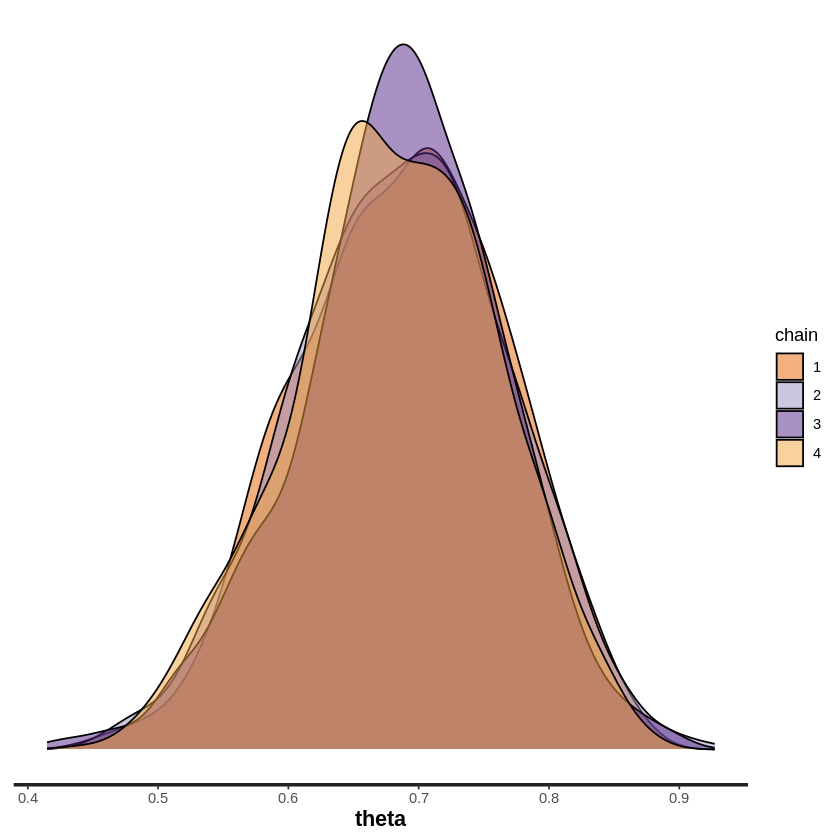

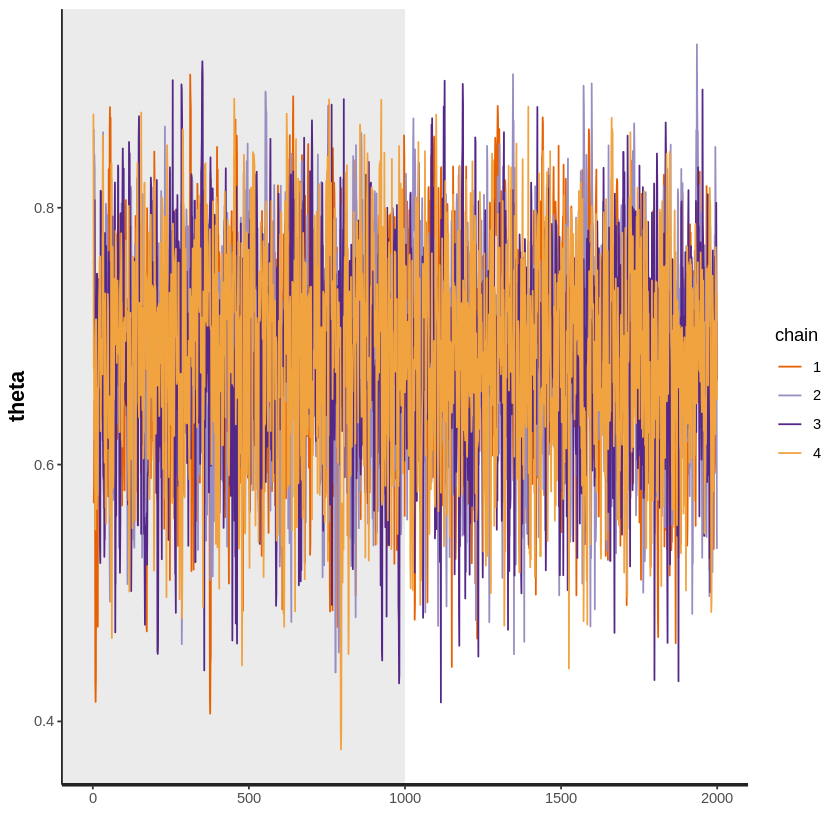

In [ ]:
stan_dens(fit1, pars="theta", separate_chains = TRUE) #The density of the posterior distribution.
stan_trace(fit1, pars="theta",inc_warmup =T) #The trace of the samples.
theta <- rstan::extract(fit1)$theta #Assigning all the samples to a variable called theta.

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.
ℹ The deprecated feature was likely used in the rstan package.
  Please report the issue at <https://github.com/stan-dev/rstan/issues/>.”


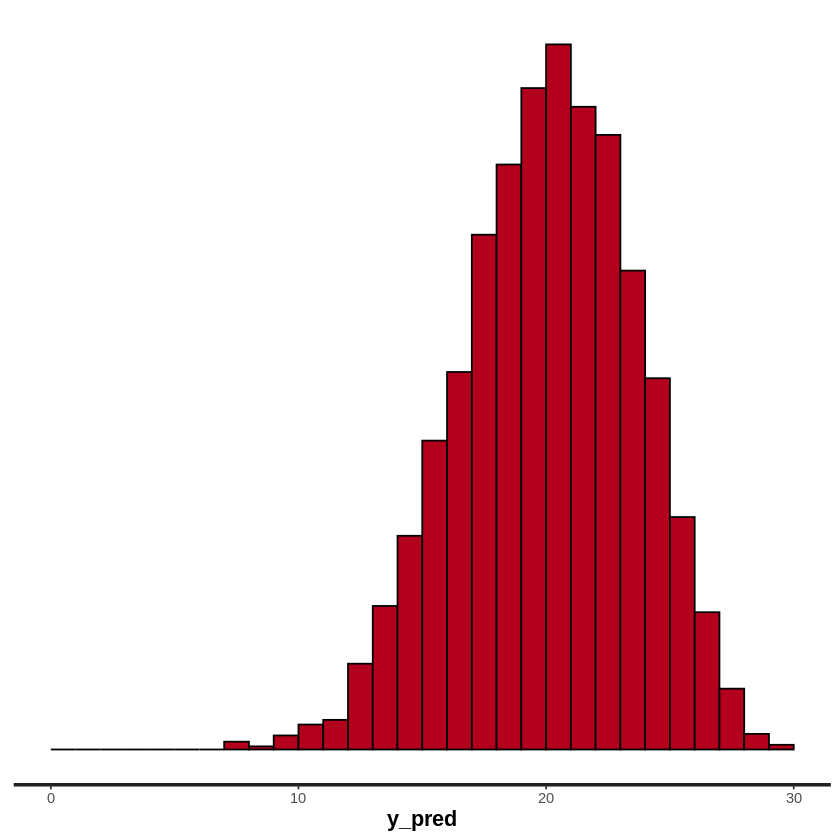

In [ ]:
stan_hist(fit1, pars="y_pred", breaks=seq(0,30,1)) 